In [1]:
import pandas as pd

# Leer dataset con la ruta de drive
ruta = '/content/drive/MyDrive/diplomatura data science/Hackaton/realistic_ocean_climate_dataset.csv'
df = pd.read_csv(ruta)

# Mostrar primeras filas
print("Primeras filas:")
print(df.head())

# Información general
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nResumen estadístico:")
print(df.describe(include='all'))

Primeras filas:
         Date            Location  Latitude  Longitude  SST (°C)  pH Level  \
0  2015-01-01             Red Sea   20.0248    38.4931     29.47     8.107   
1  2015-01-07  Great Barrier Reef  -18.2988   147.7782     29.65     8.004   
2  2015-01-14       Caribbean Sea   14.9768   -75.0233     28.86     7.947   
3  2015-01-20  Great Barrier Reef  -18.3152   147.6486     28.97     7.995   
4  2015-01-27           Galápagos   -0.8805   -90.9769     28.60     7.977   

  Bleaching Severity  Species Observed  Marine Heatwave  
0                NaN               106            False  
1               High               116            False  
2               High                90            False  
3             Medium                94            False  
4                NaN               110            False  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Cou

# Columnas del dataset:

**Date:** fecha de la medición (tipo object, conviene convertir a datetime)

**Location:** nombre del lugar (7 lugares únicos)

**Latitude, Longitude:** coordenadas

**SST (°C):** temperatura superficial del mar

**pH Level:** nivel de acidez

**Bleaching Severity:** severidad del blanqueamiento coralino (None, Low, Medium, High)

**Species Observed:** cantidad de especies observadas

**Marine Heatwave:** ola de calor marina (booleano: True/False)

# limpieza y observaciones iniciales:
No hay valores nulos, pero:

Bleaching Severity tiene "None" como string. Sería mejor convertirlo a algo más estándar o numérico.

Date es tipo texto, tal vez es mejor convertirlo a datetime.

In [2]:
# Hacemos una copia del dataset original
df_limpio = df.copy()

# 1. Convertir la columna 'Date' a tipo datetime
df_limpio['Date'] = pd.to_datetime(df_limpio['Date'], errors='coerce')

# 2. Reemplazar "None" por "No Bleaching" en 'Bleaching Severity'
df_limpio['Bleaching Severity'] = df_limpio['Bleaching Severity'].replace("None", "No Bleaching")

# 3. Convertir a tipo categórico ordenado
niveles_severidad = ["No Bleaching", "Low", "Medium", "High"]
df_limpio['Bleaching Severity'] = pd.Categorical(df_limpio['Bleaching Severity'],
                                                  categories=niveles_severidad,
                                                  ordered=True)
# Además, eliminar filas donde falta el target
df_limpio = df_limpio.dropna(subset=['Bleaching Severity']).reset_index(drop=True)

# 3. Preparar X e y
X = df_limpio.drop('Bleaching Severity', axis=1)
y = df_limpio['Bleaching Severity']

# 4. Verificar limpieza
print(df_limpio.info())
print(df_limpio.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                350 non-null    datetime64[ns]
 1   Location            350 non-null    object        
 2   Latitude            350 non-null    float64       
 3   Longitude           350 non-null    float64       
 4   SST (°C)            350 non-null    float64       
 5   pH Level            350 non-null    float64       
 6   Bleaching Severity  350 non-null    category      
 7   Species Observed    350 non-null    int64         
 8   Marine Heatwave     350 non-null    bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 20.2+ KB
None
        Date            Location  Latitude  Longitude  SST (°C)  pH Level  \
0 2015-01-07  Great Barrier Reef  -18.2988   147.7782     29.65     8.004   
1 2015-01-14     

# Analisis exploratorio de datos EDA

-Distribución de temperatura y pH

-Relación entre temperatura y severidad

-Evolución en el tiempo

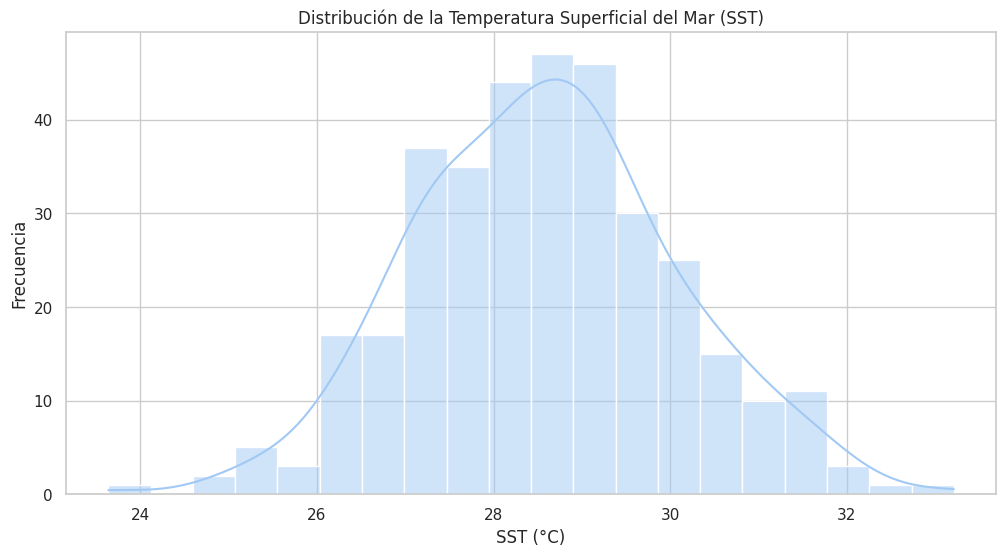

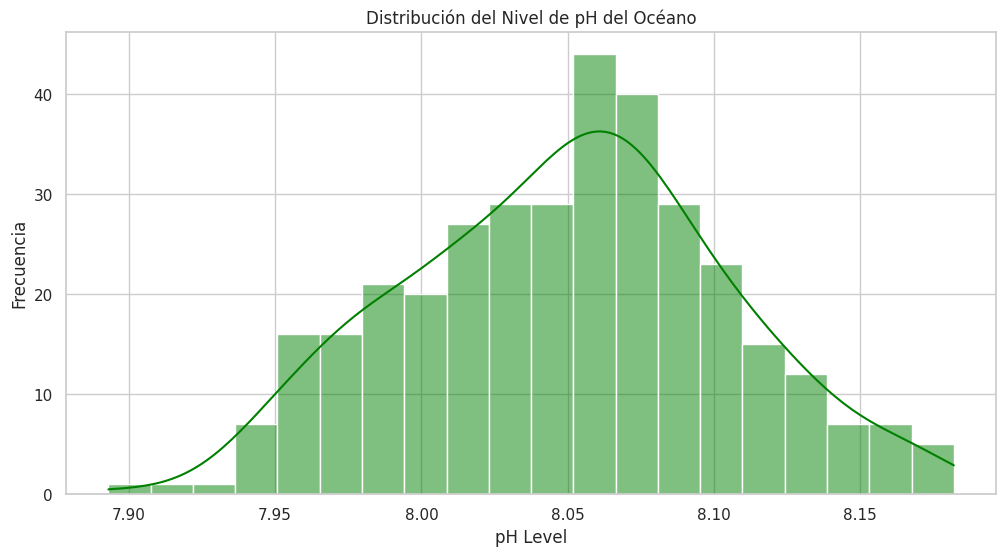

/tmp/ipython-input-3-618301721.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x='Bleaching Severity', y='SST (°C)', palette='Set2')


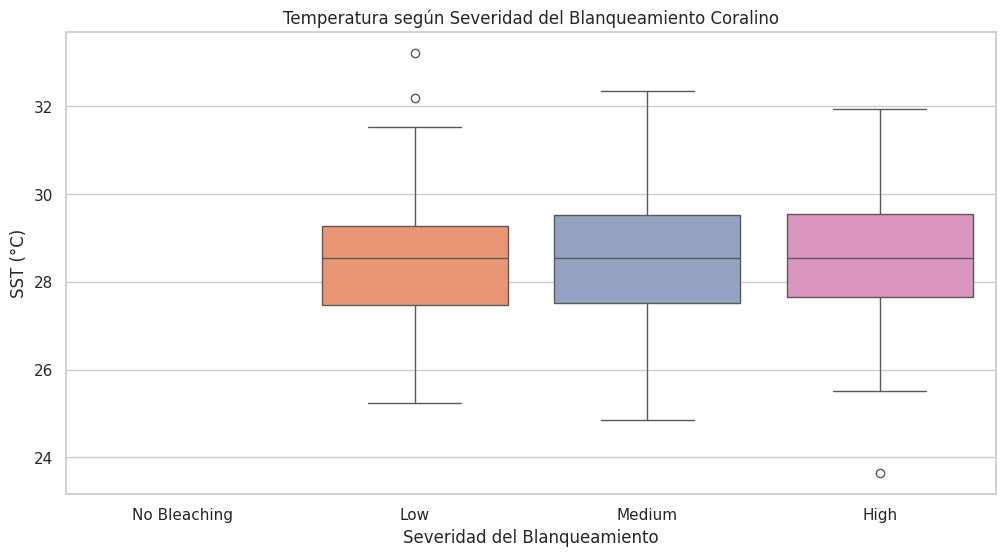

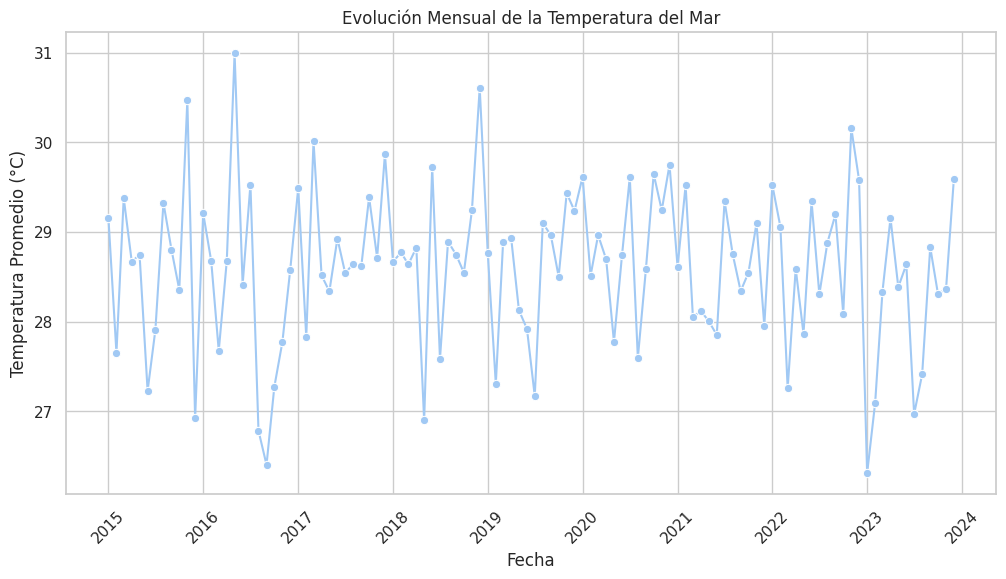

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Histograma de la Temperatura Superficial del Mar (SST)
plt.figure()
sns.histplot(df_limpio['SST (°C)'], kde=True, bins=20)
plt.title('Distribución de la Temperatura Superficial del Mar (SST)')
plt.xlabel('SST (°C)')
plt.ylabel('Frecuencia')
plt.show()

# 2. Histograma del pH del Océano
plt.figure()
sns.histplot(df_limpio['pH Level'], kde=True, bins=20, color='green')
plt.title('Distribución del Nivel de pH del Océano')
plt.xlabel('pH Level')
plt.ylabel('Frecuencia')
plt.show()

# 3. Boxplot: SST vs Severidad del Blanqueamiento
plt.figure()
sns.boxplot(data=df_limpio, x='Bleaching Severity', y='SST (°C)', palette='Set2')
plt.title('Temperatura según Severidad del Blanqueamiento Coralino')
plt.xlabel('Severidad del Blanqueamiento')
plt.ylabel('SST (°C)')
plt.show()

# 4. Línea de tiempo: Evolución mensual del SST
df_limpio['Mes'] = df_limpio['Date'].dt.to_period('M')
sst_tiempo = df_limpio.groupby('Mes')['SST (°C)'].mean().reset_index()
sst_tiempo['Mes'] = sst_tiempo['Mes'].dt.to_timestamp()

plt.figure()
sns.lineplot(data=sst_tiempo, x='Mes', y='SST (°C)', marker='o')
plt.title('Evolución Mensual de la Temperatura del Mar')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (°C)')
plt.xticks(rotation=45)
plt.show()

# MODELO DE MACHINE LEARNING PARA PREDECIR QUE PASA SI SE DA UNA OLA DE CALOR MARINA (MARIN HEATWAVE)

Es una variable binaria → ideal para empezar con:

Regresión logística

Árbol de decisión

Random Forest



# PASOS:

Vamos a:

Seleccionar columnas numéricas útiles (SST (°C), pH Level, etc.)

Convertir Marine Heatwave a 0/1

Dividir en train/test

Estandarizar variables

Entrenar y evaluar el modelo



# **Todo junto:**


Información del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                500 non-null    datetime64[ns]
 1   Location            500 non-null    object        
 2   Latitude            500 non-null    float64       
 3   Longitude           500 non-null    float64       
 4   SST (°C)            500 non-null    float64       
 5   pH Level            500 non-null    float64       
 6   Bleaching Severity  350 non-null    category      
 7   Species Observed    500 non-null    int64         
 8   Marine Heatwave     500 non-null    bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 28.6+ KB
None

Primeras filas del dataset limpio:
        Date            Location  Latitude  Longitude  SST (°C)  pH Level  \
0 2015-01-01             

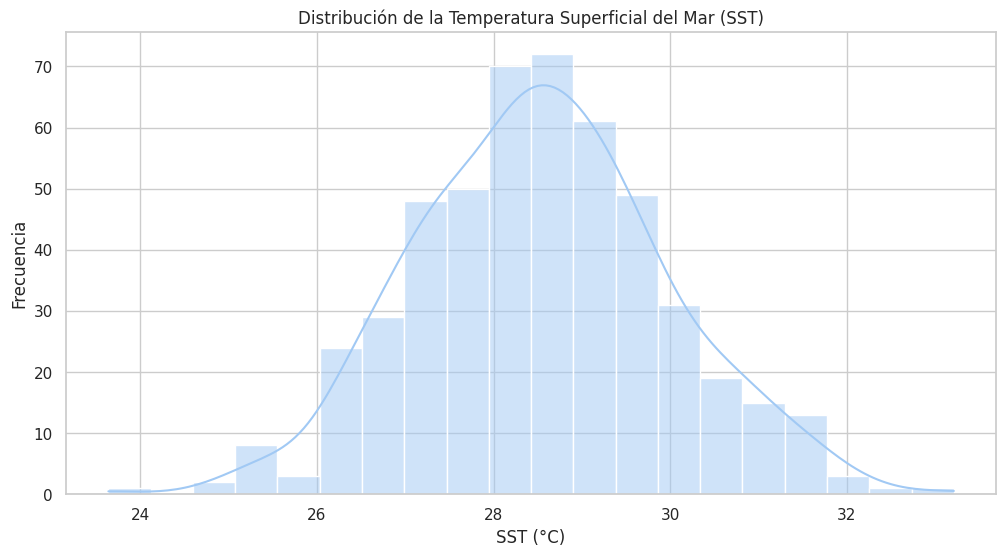

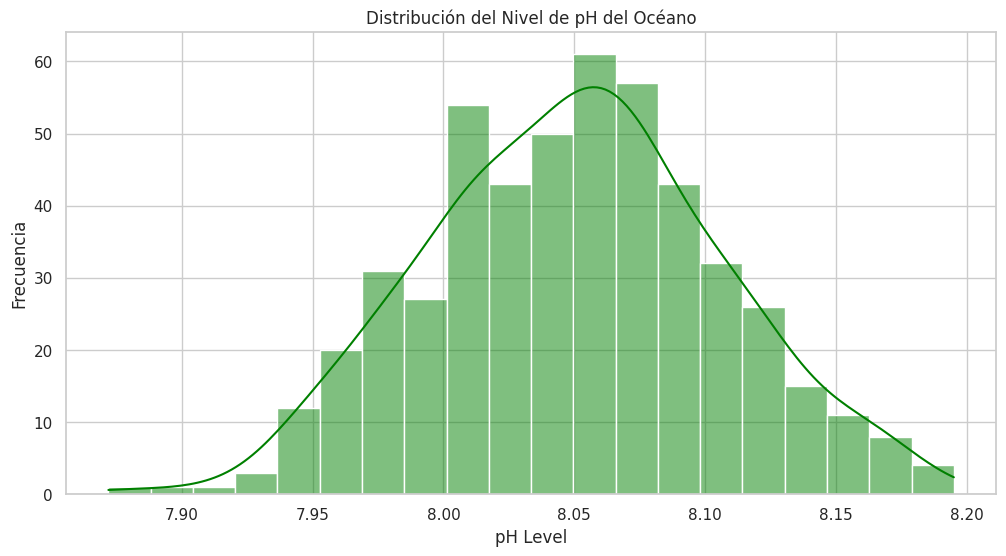

/tmp/ipython-input-4-1280845248.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x='Bleaching Severity', y='SST (°C)', palette='Set2')


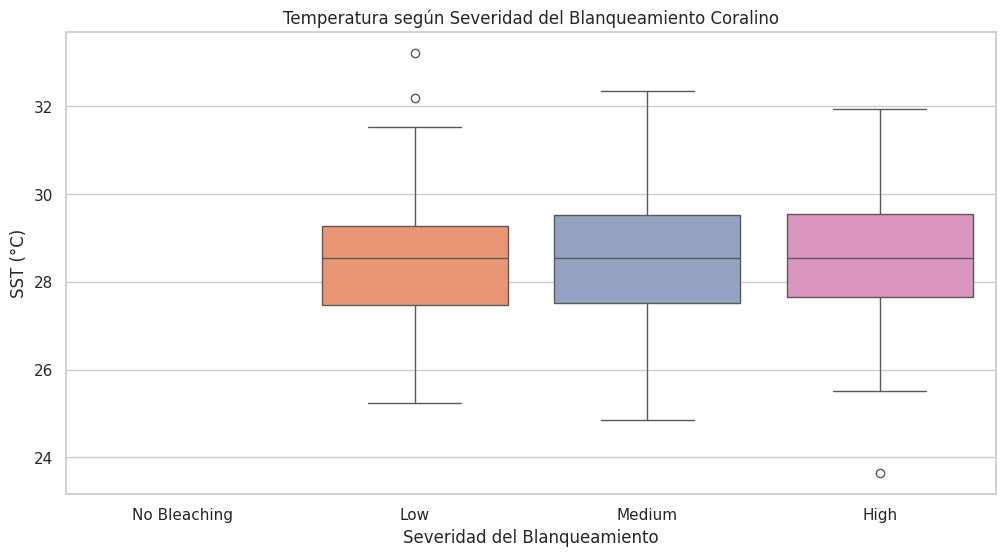

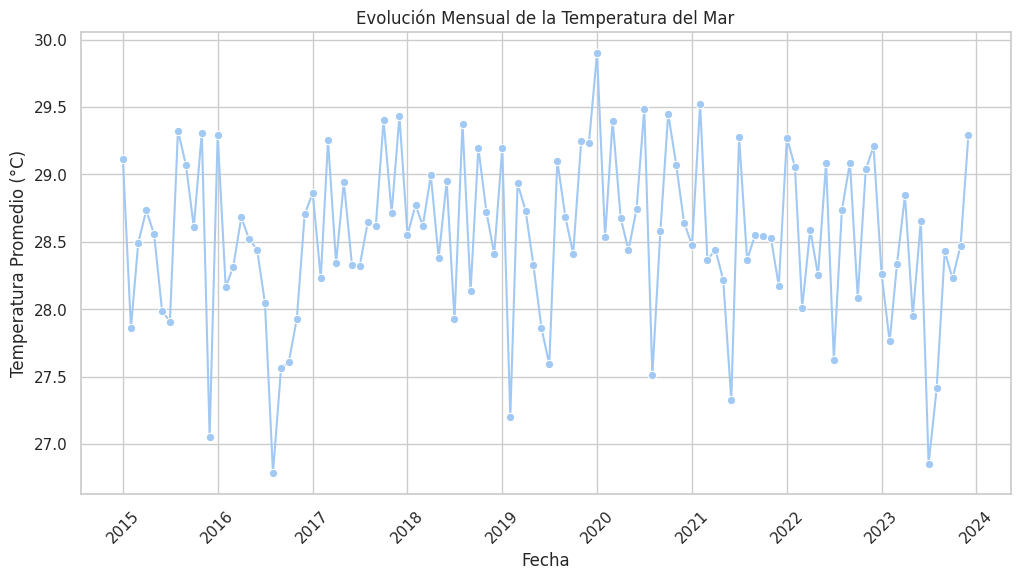


--- RESULTADOS DEL MODELO ---
Accuracy: 1.0

Matriz de Confusión:
 [[122   0]
 [  0  28]]

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       122
        True       1.00      1.00      1.00        28

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [4]:
# --- IMPORTACIONES ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- PASO 1: CARGAR Y LIMPIAR DATASET ---
# Ruta del archivo
ruta = '/content/drive/MyDrive/diplomatura data science/Hackaton/realistic_ocean_climate_dataset.csv'

# Cargar datos
df = pd.read_csv(ruta)

# Copia del dataset original
df_limpio = df.copy()

# 1. Convertir 'Date' a tipo datetime
df_limpio['Date'] = pd.to_datetime(df_limpio['Date'], errors='coerce')

# 2. Reemplazar 'None' por 'No Bleaching' en 'Bleaching Severity'
df_limpio['Bleaching Severity'] = df_limpio['Bleaching Severity'].replace("None", "No Bleaching")

# 3. Convertir 'Bleaching Severity' a categoría ordenada
niveles_severidad = ["No Bleaching", "Low", "Medium", "High"]
df_limpio['Bleaching Severity'] = pd.Categorical(df_limpio['Bleaching Severity'],
                                                  categories=niveles_severidad,
                                                  ordered=True)

# 4. Corregir 'Marine Heatwave' (convertir 'Yes' -> 1, 'No' -> 0)
df_limpio['Marine Heatwave'] = df_limpio['Marine Heatwave'].replace({'Yes': 1, 'No': 0})

# 5. Eliminar filas donde falta el objetivo
df_limpio = df_limpio.dropna(subset=['Marine Heatwave']).reset_index(drop=True)

# Mostrar info del dataset limpio
print("\nInformación del dataset limpio:")
print(df_limpio.info())
print("\nPrimeras filas del dataset limpio:")
print(df_limpio.head())

# --- PASO 2: VISUALIZACIONES ---

sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 6)

# Histograma de la Temperatura del Mar (SST)
plt.figure()
sns.histplot(df_limpio['SST (°C)'], kde=True, bins=20)
plt.title('Distribución de la Temperatura Superficial del Mar (SST)')
plt.xlabel('SST (°C)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del Nivel de pH
plt.figure()
sns.histplot(df_limpio['pH Level'], kde=True, bins=20, color='green')
plt.title('Distribución del Nivel de pH del Océano')
plt.xlabel('pH Level')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot: SST vs Severidad del Blanqueamiento
plt.figure()
sns.boxplot(data=df_limpio, x='Bleaching Severity', y='SST (°C)', palette='Set2')
plt.title('Temperatura según Severidad del Blanqueamiento Coralino')
plt.xlabel('Severidad del Blanqueamiento')
plt.ylabel('SST (°C)')
plt.show()

# Línea de tiempo: Evolución mensual de la SST
df_limpio['Mes'] = df_limpio['Date'].dt.to_period('M')
sst_tiempo = df_limpio.groupby('Mes')['SST (°C)'].mean().reset_index()
sst_tiempo['Mes'] = sst_tiempo['Mes'].dt.to_timestamp()

plt.figure()
sns.lineplot(data=sst_tiempo, x='Mes', y='SST (°C)', marker='o')
plt.title('Evolución Mensual de la Temperatura del Mar')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (°C)')
plt.xticks(rotation=45)
plt.show()

# --- PASO 3: PREPARACIÓN PARA MACHINE LEARNING ---

# Variables predictoras
X = df_limpio[['SST (°C)', 'pH Level', 'Species Observed']]

# Variable objetivo
y = df_limpio['Marine Heatwave']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- PASO 4: ENTRENAMIENTO DEL MODELO ---
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train_scaled, y_train)

# --- PASO 5: EVALUACIÓN DEL MODELO ---
y_pred = modelo_log.predict(X_test_scaled)

# Métricas
print("\n--- RESULTADOS DEL MODELO ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

## **OTRO ENFOQUE**

# Descripción del Dataset
Este conjunto de datos, creado por Atharva Soundankar, contiene mediciones sintéticas pero realistas de variables oceánicas, incluyendo:

Temperatura superficial del mar (SST)

Niveles de pH

Severidad del blanqueamiento de corales

Observaciones de especies marinas

Estas variables están diseñadas para reflejar condiciones oceánicas y su impacto en la vida marina.



# Objetivo del Análisis

Análisis exploratorio de datos (EDA): Examinar la distribución y relaciones entre las variables.

Clustering: Agrupar observaciones similares para identificar patrones en los datos.

Regresión: Predecir variables continuas como la temperatura del mar o los niveles de pH.

Clasificación: Si se define una variable categórica basada en los datos, como niveles de severidad del blanqueamiento de corales.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive #  linkear con google drive donde esta el csv
drive.mount('/content/drive')

In [7]:
df = pd.read_csv("/content/drive/MyDrive/diplomatura data science/Hackaton/realistic_ocean_climate_dataset.csv")
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


In [8]:
# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                500 non-null    object 
 1   Location            500 non-null    object 
 2   Latitude            500 non-null    float64
 3   Longitude           500 non-null    float64
 4   SST (°C)            500 non-null    float64
 5   pH Level            500 non-null    float64
 6   Bleaching Severity  350 non-null    object 
 7   Species Observed    500 non-null    int64  
 8   Marine Heatwave     500 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 31.9+ KB
None
         Latitude   Longitude    SST (°C)    pH Level  Species Observed
count  500.000000  500.000000  500.000000  500.000000        500.000000
mean     6.728440   11.930638   28.537200    8.049872        120.472000
std     13.534648  108.174778    1.425076    0.055707         20

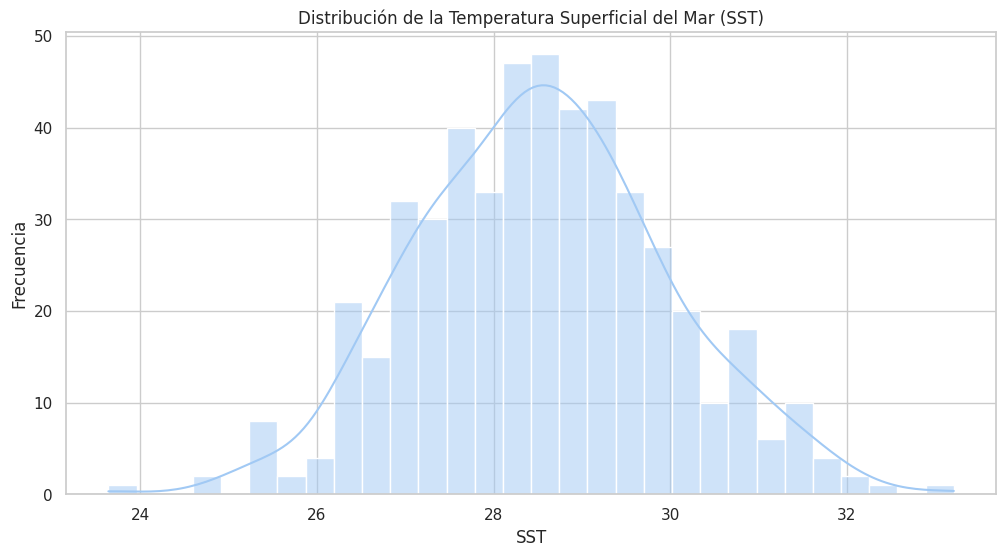

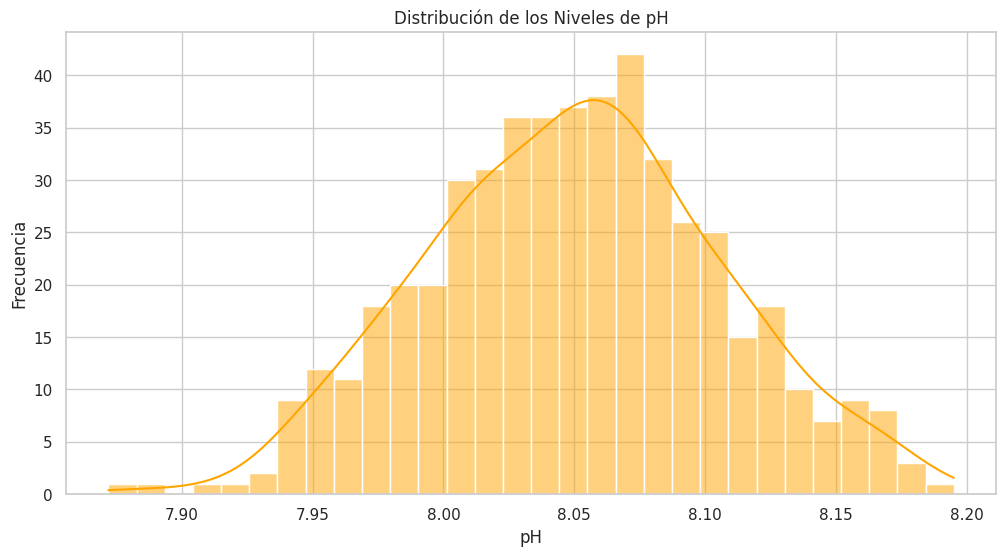

In [9]:

# Histograma de SST
sns.histplot(df['SST (°C)'], bins=30, kde=True)
plt.title('Distribución de la Temperatura Superficial del Mar (SST)')
plt.xlabel('SST')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de pH
sns.histplot(df['pH Level'], bins=30, kde=True, color='orange')
plt.title('Distribución de los Niveles de pH')
plt.xlabel('pH')
plt.ylabel('Frecuencia')
plt.show()


Información del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                500 non-null    datetime64[ns]
 1   Location            500 non-null    object        
 2   Latitude            500 non-null    float64       
 3   Longitude           500 non-null    float64       
 4   SST (°C)            500 non-null    float64       
 5   pH Level            500 non-null    float64       
 6   Bleaching Severity  350 non-null    category      
 7   Species Observed    500 non-null    int64         
 8   Marine Heatwave     500 non-null    bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 28.6+ KB
None

Primeras filas del dataset limpio:
        Date            Location  Latitude  Longitude  SST (°C)  pH Level  \
0 2015-01-01             

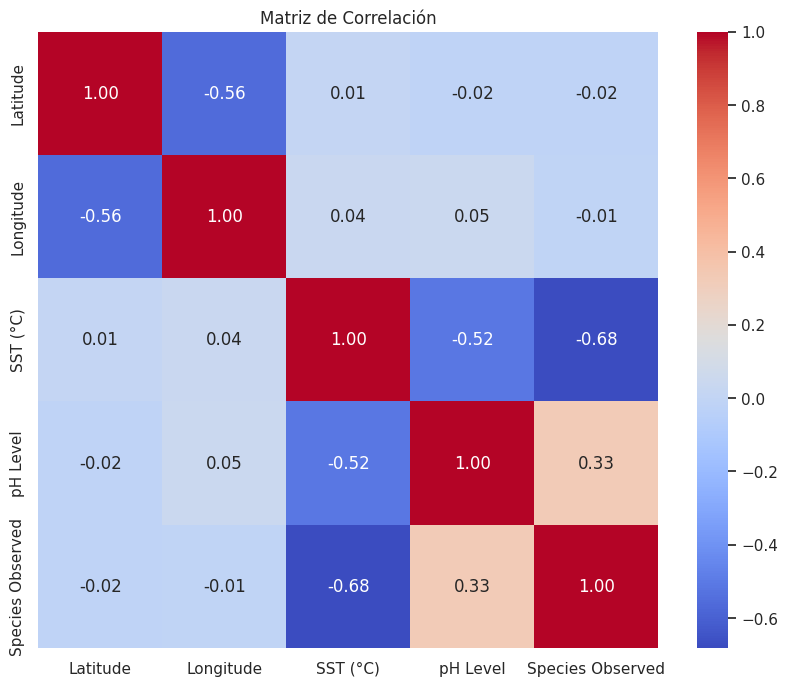

In [10]:
# Copia del dataset original
df_limpio = df.copy()

# 1. Convertir 'Date' a tipo datetime
df_limpio['Date'] = pd.to_datetime(df_limpio['Date'], errors='coerce')

# 2. Reemplazar 'None' por 'No Bleaching' en 'Bleaching Severity'
df_limpio['Bleaching Severity'] = df_limpio['Bleaching Severity'].replace("None", "No Bleaching")

# 3. Convertir 'Bleaching Severity' a categoría ordenada
niveles_severidad = ["No Bleaching", "Low", "Medium", "High"]
df_limpio['Bleaching Severity'] = pd.Categorical(df_limpio['Bleaching Severity'],
                                                  categories=niveles_severidad,
                                                  ordered=True)

# 4. Corregir 'Marine Heatwave' (convertir 'Yes' -> 1, 'No' -> 0)
df_limpio['Marine Heatwave'] = df_limpio['Marine Heatwave'].replace({'Yes': 1, 'No': 0})

# 5. Eliminar filas donde falta el objetivo
df_limpio = df_limpio.dropna(subset=['Marine Heatwave']).reset_index(drop=True)

# Mostrar info del dataset limpio
print("\nInformación del dataset limpio:")
print(df_limpio.info())
print("\nPrimeras filas del dataset limpio:")
print(df_limpio.head())


# Seleccionar solo columnas numéricas para la matriz de correlación
df_numericas = df_limpio.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = df_numericas.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

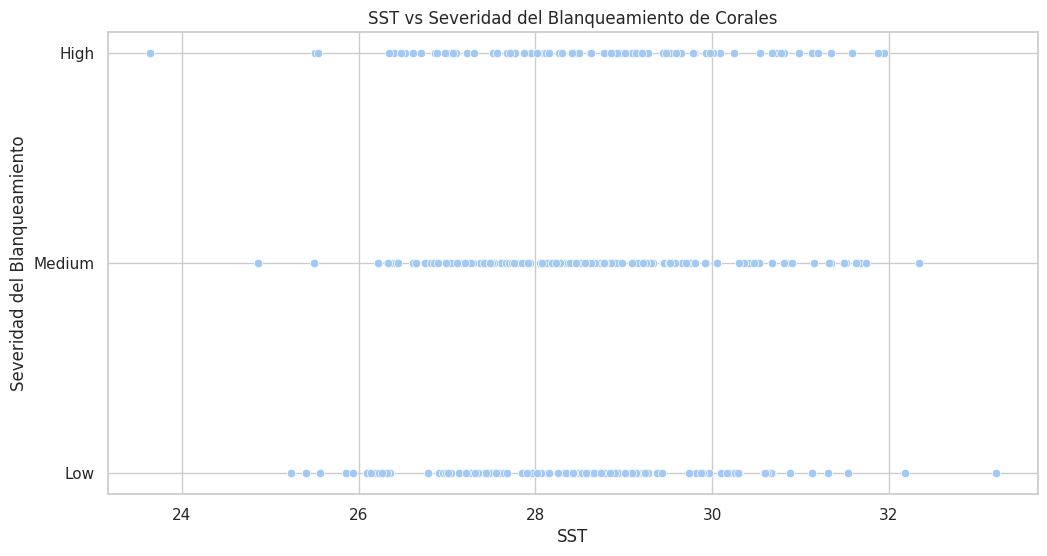

In [11]:
# Diagrama de dispersión entre SST y severidad del blanqueamiento
sns.scatterplot(x='SST (°C)', y='Bleaching Severity', data=df)
plt.title('SST vs Severidad del Blanqueamiento de Corales')
plt.xlabel('SST')
plt.ylabel('Severidad del Blanqueamiento')
plt.show()

# Preprocesamiento de los Datos
Antes de aplicar modelos, es importante preprocesar los datos:

Valores nulos: Verifica y maneja valores faltantes.

Codificación de variables categóricas: Si hay variables categóricas, conviértelas en variables numéricas.

Normalización o estandarización: Escala las variables numéricas si es necesario.

In [12]:
# Ver valores nulos por columna
print(df_limpio.isnull().sum())

Date                    0
Location                0
Latitude                0
Longitude               0
SST (°C)                0
pH Level                0
Bleaching Severity    150
Species Observed        0
Marine Heatwave         0
dtype: int64


In [13]:
#Ya sabemos que Bleaching Severity tiene valores nulos. Si es importante para el análisis, podemos imputarla o eliminar las filas nulas:
# Agregar la categoría 'Unknown' antes de usar fillna
df_limpio['Bleaching Severity'] = df_limpio['Bleaching Severity'].cat.add_categories('Unknown')
df_limpio['Bleaching Severity'] = df_limpio['Bleaching Severity'].fillna('Unknown')
df_limpio['Bleaching Severity'] = df_limpio['Bleaching Severity'].fillna('Unknown')

In [14]:
# Codificación de la variable categórica 'Location' usando one-hot encoding
df_limpio = pd.get_dummies(df_limpio, columns=['Location'], drop_first=True)

# Codificación ordinal para 'Bleaching Severity'
severity_map = {'Low': 1, 'Medium': 2, 'High': 3}
df_limpio['Bleaching Severity'] = df_limpio['Bleaching Severity'].map(severity_map)

Conversión de variable booleana
Convertimos Marine Heatwave de bool a int:

In [15]:
df_limpio['Marine Heatwave'] = df_limpio['Marine Heatwave'].astype(int)

In [16]:
# Selección de variables numéricas a escalar
columnas_a_escalar = ['Latitude', 'Longitude', 'SST (°C)', 'pH Level', 'Species Observed']

scaler = StandardScaler()
df_limpio[columnas_a_escalar] = scaler.fit_transform(df_limpio[columnas_a_escalar])

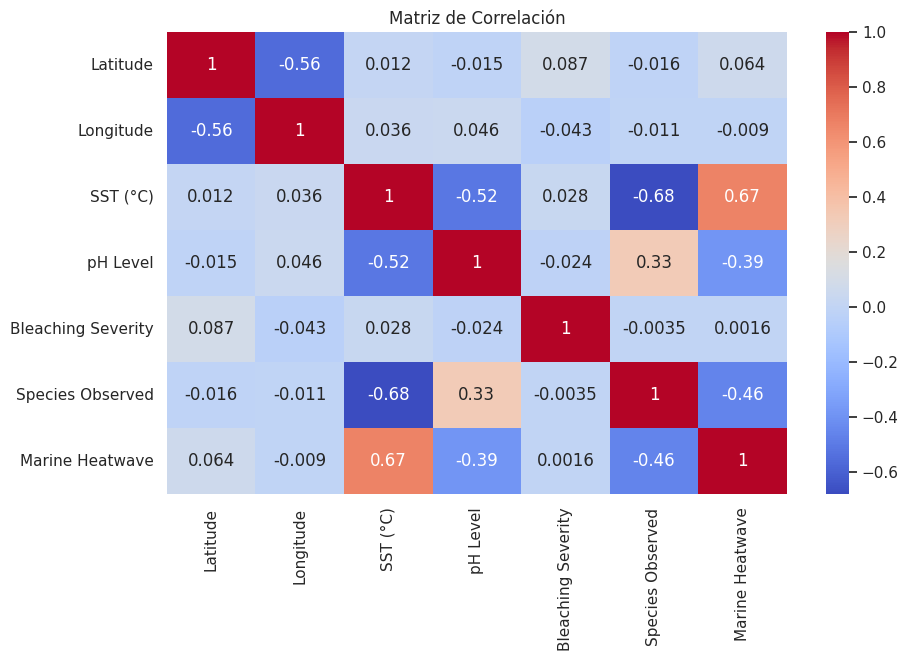

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df_limpio.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Preparar Features y Target
## Supongamos que usamos Marine Heatwave como target:

In [18]:
# Codificar variables categóricas
df_modelo = pd.get_dummies(df_limpio, columns=['Bleaching Severity'], drop_first=True)

# Separar features y target
X = df_modelo.drop(columns=['Marine Heatwave', 'Date'])  # Date se puede excluir
y = df_modelo['Marine Heatwave']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Aplicar Random Forest

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluación
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Matriz de Confusión:
 [[85  0]
 [ 1 14]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           1       1.00      0.93      0.97        15

    accuracy                           0.99       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.99      0.99      0.99       100



## Probar XGBoost

In [20]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluación
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Reporte de Clasificación:\n", classification_report(y_test, y_pred_xgb))

Matriz de Confusión:
 [[85  0]
 [ 2 13]]
XGBoost Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      0.87      0.93        15

    accuracy                           0.98       100
   macro avg       0.99      0.93      0.96       100
weighted avg       0.98      0.98      0.98       100

